Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [23]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

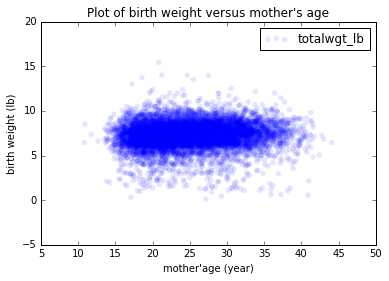

In [24]:
import nsfg
import thinkplot
import thinkstats2
import math
import numpy as np


df = nsfg.ReadFemPreg()

#drops rows with nan inputs to make the array equal length"
df = df[df.totalwgt_lb.notnull()]
df = df[df.agepreg.notnull()]

#df = df.dropna(subset =['df.totalwgt_lb', 'df.agepreg'])

wgt_birth = df.totalwgt_lb
age_mother = df.agepreg
    
thinkplot.Scatter(age_mother, wgt_birth, alpha = 0.1)
thinkplot.Show(xlabel = 'mother'+"'"+'age (year)', 
               ylabel = 'birth weight (lb)', 
               title='Plot of birth weight versus mother'+"'"+'s age')

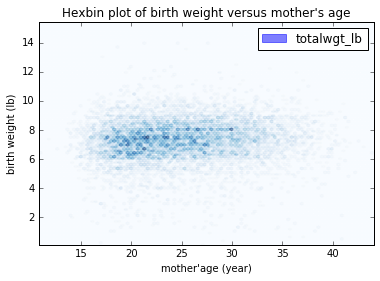

In [25]:
thinkplot.HexBin(age_mother, wgt_birth, alpha = 0.5) #Hexbin plot
thinkplot.Show(xlabel = 'mother'+"'"+'age (year)', 
               ylabel = 'birth weight (lb)', 
               title='Hexbin plot of birth weight versus mother'+"'"+'s age')

From the scatter plots, it seems like there isn't an obvious cause & effect relationship between the weight of the baby and the mother's age.

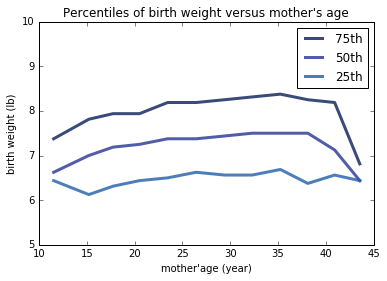

In [26]:
grouplength = 3
bins = np.arange (int(age_mother.min()), int(age_mother.max())+1, grouplength)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age, weights, label = label)
    
thinkplot.Show(xlabel = 'mother'+"'"+'age (year)', 
               ylabel = 'birth weight (lb)', 
               title='Percentiles of birth weight versus mother'+"'"+'s age',
               axis = [10,45,5,10.0])

When the grouplength is set to 1, there are a lot of noise but there seem like the birth eight increases with mother's age but declines after 36. There are a lot of jumps in percentile graph for mother's age in early 10s and above 40 but this might be due to limited number of people interviewed compared to those in other age (graph is less smooth)

When the grouplength is set to 3, we can see the trend much more clearly. The weight increases gradually till the age of ~35 (it might be other value because we grouped it by 3) but then decline more rapidly afterwards.

In [27]:
# print "The Covariance is", thinkstats2.Cov(age_mother, wgt_birth)
pearson_c = thinkstats2.Corr(age_mother, wgt_birth)
print "The Pearson's correlation is", pearson_c

The Pearson's correlation is 0.0688339703541


From the Pearson's correlation value, the birth weight and age of mother has very weak positive linear correlation. This might be due to the fact that the value is scattered around a very large area (from the scatter plot)

In [28]:
spearman_c = thinkstats2.SpearmanCorr(age_mother, wgt_birth)
print "The Spearman rank correlation is",  spearman_c

print "Difference in Spearman and Pearson correlation is ", spearman_c-pearson_c

The Spearman rank correlation is 0.0946100410966
Difference in Spearman and Pearson correlation is  0.0257760707425


The Spearman's correlation show that there is almost no correlation between the baby's weight and the mother's age. 
The difference shows the amount pearson's correlation is affected by nonlinearity, skewdness and outliers.